# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_hh_income.shape, df_pct_poverty.shape, df_pct_completed_hs.shape, df_share_race_city.shape, df_fatalities.shape

((29322, 3), (29329, 3), (29329, 3), (29268, 7), (2535, 14))

In [6]:
#df_hh_income.info(), df_pct_poverty.info(), df_pct_completed_hs.info(), df_share_race_city.info(), df_fatalities.info()

In [7]:
df_hh_income.isna().values.any(), df_pct_poverty.isna().values.any(), df_pct_completed_hs.isna().values.any(), df_share_race_city.isna().values.any(), df_fatalities.isna().values.any()

(np.True_, np.False_, np.False_, np.False_, np.True_)

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [8]:
#Analysis of the NaN values : 
df_hh_income[df_hh_income['Median Income'].isna()].head()

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN


In [9]:
#Replacing NAN by 0
df_hh_income['Median Income'] = df_hh_income['Median Income'].fillna(0)
df_hh_income[df_hh_income['Median Income'].isna()].head() 

,Geographic Area,City,Median Income


In [10]:
#Analysis of the NaN values : 
df_fatalities.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [11]:
df_fatalities = df_fatalities.dropna()

In [12]:
#No more NA values
df_hh_income.isna().values.any(), df_pct_poverty.isna().values.any(), df_pct_completed_hs.isna().values.any(), df_share_race_city.isna().values.any(), df_fatalities.isna().values.any()

(np.False_, np.False_, np.False_, np.False_, np.False_)

In [13]:
#No duplicated values
df_hh_income.duplicated().values.any(), df_pct_poverty.duplicated().values.any(), df_pct_completed_hs.duplicated().values.any(), df_share_race_city.duplicated().values.any(), df_fatalities.duplicated().values.any()

(np.False_, np.False_, np.False_, np.False_, np.False_)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [14]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [15]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [16]:
df_pct_poverty['poverty_rate'].value_counts()

poverty_rate
0       1464
-        201
7.4      129
6.7      129
10       128
        ... 
73.7       1
92.7       1
72.4       1
68.2       1
94.1       1
Name: count, Length: 771, dtype: int64

In [17]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].str.replace('-', '0')

In [18]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)

In [19]:
state_pov_rate = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
state_pov_rate = state_pov_rate.sort_values(by='poverty_rate', ascending=False)
state_pov_rate.head()

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.27
10,GA,23.66
2,AR,22.96
32,NM,22.51


In [20]:
import plotly.express as px
fig1 = px.bar(x=state_pov_rate['Geographic Area'], y=state_pov_rate['poverty_rate'] , title='US State poverty rate ranking')
fig1.update_layout(xaxis_title='States', yaxis_title='Poverty rate')

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [21]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [22]:
df_pct_completed_hs[df_pct_completed_hs.index == df_pct_completed_hs['percent_completed_hs'].idxmin()]

,Geographic Area,City,percent_completed_hs
573,AL,Whatley CDP,-


In [23]:
from numpy import nan 
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].replace('-', nan)

In [24]:
df_pct_completed_hs.dropna()
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)

In [25]:
hs_rate_g = df_pct_completed_hs.groupby('Geographic Area').mean('percent_completed_hs').reset_index()
hs_rate_g.head()

,Geographic Area,percent_completed_hs
0,AK,84.63
1,AL,80.30
2,AR,79.95
3,AZ,80.47
4,CA,81.96


In [26]:
hs_rate_g[hs_rate_g.index == hs_rate_g['percent_completed_hs'].idxmax()]

,Geographic Area,percent_completed_hs
19,MA,92.40


In [27]:
hs_rate_g[hs_rate_g.index == hs_rate_g['percent_completed_hs'].idxmin()]

,Geographic Area,percent_completed_hs
43,TX,75.69


In [28]:
hs_rate_g.sort_values(by='percent_completed_hs', ascending=False, inplace=True)
fig2 = px.bar(x=hs_rate_g['Geographic Area'], y=hs_rate_g['percent_completed_hs'], title='High School Graduation Rate by US State')
fig2.update_layout(xaxis_title='US states', yaxis_title='HS rate')

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [29]:
pov_vs_hs = pd.merge(hs_rate_g, state_pov_rate, on='Geographic Area')
pov_vs_hs.head()

,Geographic Area,percent_completed_hs,poverty_rate
0,MA,92.40,9.55
1,WY,92.10,9.06
2,HI,91.67,13.40
3,UT,91.62,11.72
4,CT,91.59,9.14


Text(0, 0.5, 'Poverty rate')

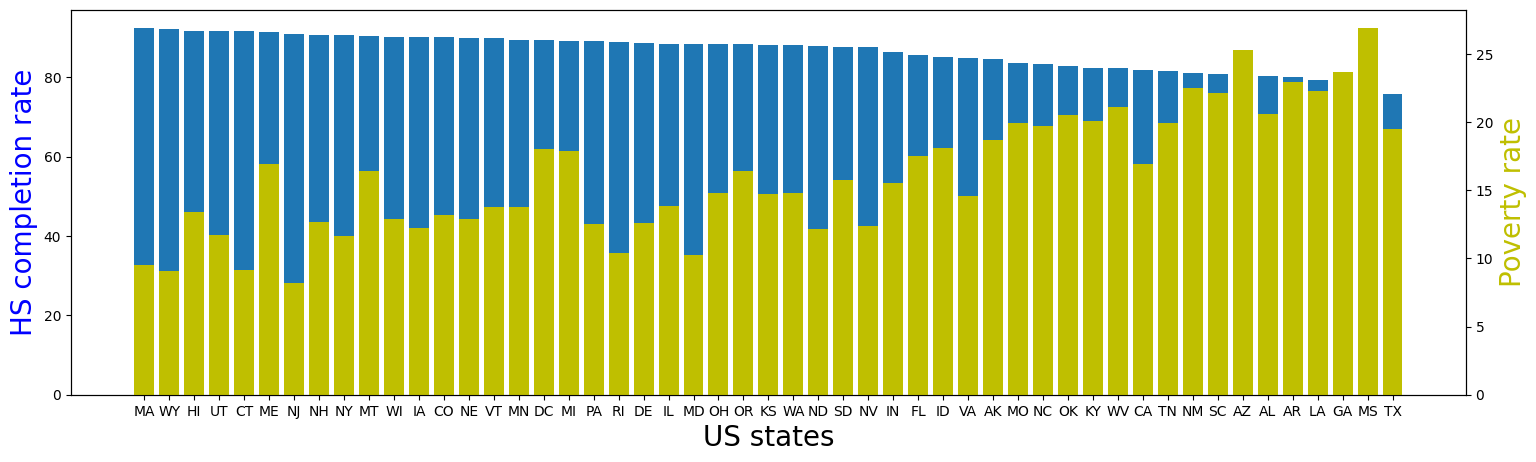

In [30]:
fig3 = plt.figure(figsize=(18,5))
ax1 = plt.gca() #GetCurrentAxis
ax1.bar(pov_vs_hs['Geographic Area'], pov_vs_hs['percent_completed_hs'])
ax1.set_xlabel('US states', size=20)
ax1.set_ylabel('HS completion rate', color='b', size=20)

ax2 = plt.twinx()
ax2.bar(pov_vs_hs['Geographic Area'], pov_vs_hs['poverty_rate'], color='y')
ax2.set_ylabel('Poverty rate',  color='y', size=20)

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

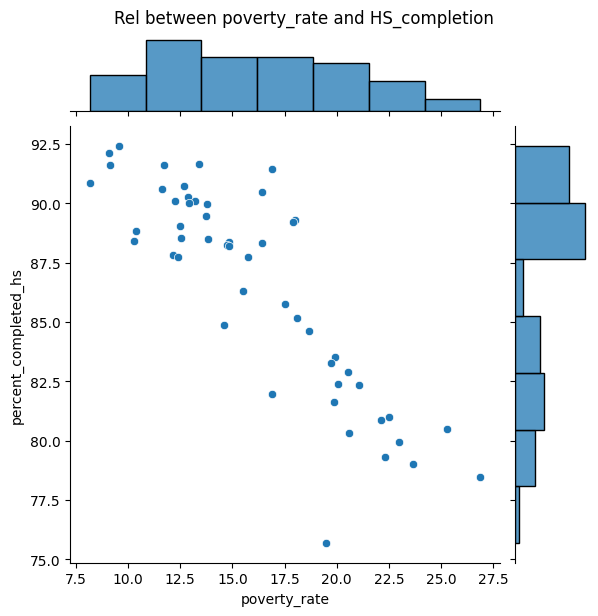

In [31]:
import seaborn as sns
sns.jointplot(pov_vs_hs, x='poverty_rate', y='percent_completed_hs')
plt.suptitle('Rel between poverty_rate and HS_completion', y=1.02)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Axes: xlabel='poverty_rate', ylabel='percent_completed_hs'>

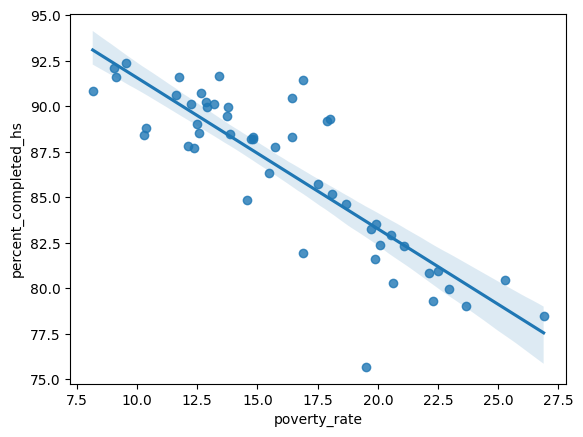

In [32]:
sns.regplot(data=pov_vs_hs, 
            x='poverty_rate',
            y='percent_completed_hs')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [33]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [34]:
df_share_race_city = df_share_race_city[df_share_race_city['share_hispanic'] != '(X)']

In [35]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].astype(float)

In [36]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29248 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29248 non-null  object 
 1   City                   29248 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


In [37]:
share_race = df_share_race_city.groupby('Geographic area').mean(numeric_only=True)
share_race.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


In [38]:
stack_race = share_race.stack().reset_index()
stack_race.columns = ['Area', 'Race', 'Count']
stack_race.head()

,Area,Race,Count
0,AK,share_white,45.65
1,AK,share_black,0.57
2,AK,share_native_american,45.86
3,AK,share_asian,1.39
4,AK,share_hispanic,2.15


In [39]:
bar = px.bar(x=stack_race['Area'], y=stack_race['Count'], color=stack_race['Race'])
bar.update_layout(xaxis_title='US States', yaxis_title='Race repartition')
bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [40]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [41]:
death_g = df_fatalities['race'].value_counts().reset_index()

In [42]:
fig4 = px.pie(death_g, names='race', values='count', hole=0.6, title='Death by race', width=500, height=400)
fig4.update_layout(title_x=0.5)
fig4.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [43]:
sex_death_g = df_fatalities['gender'].value_counts().reset_index()

In [44]:
fig5 = px.bar(sex_death_g, x='gender', y='count', title='Death by gender', width=400, height=400)
fig5.update_layout(title_x=0.5)
fig5.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [45]:
fig6 = px.box(df_fatalities,
             y='age',
             x='manner_of_death',
             color='gender',
             points='all',
             title='Age and Manner of Death',
             width=600, height=600)
fig6.update_layout(title_x=0.5)
fig6.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [46]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [55]:
armes_df = df_fatalities.groupby('armed').size().reset_index()
armes_df.rename(columns={armes_df.columns[1]: 'count'},inplace=True)

In [58]:
list1=['gun', 'unarmed']
filter1 = armes_df['armed'].isin(list1)
armes_df = armes_df[filter1]

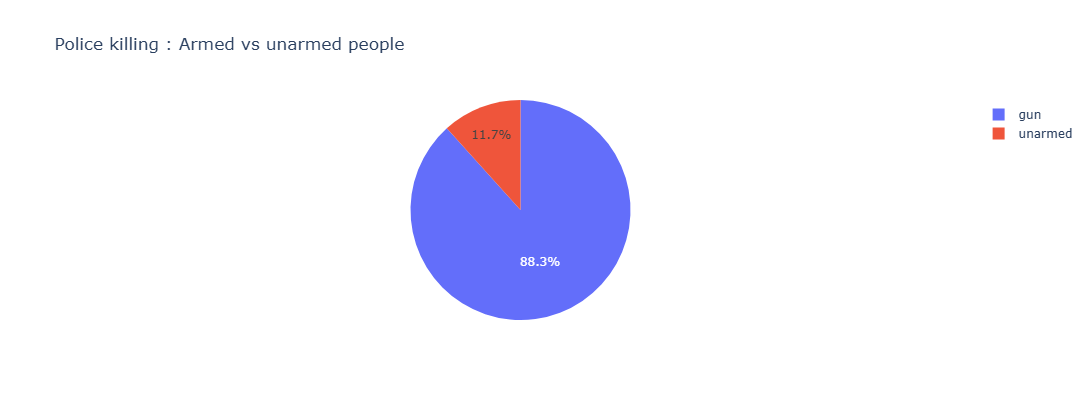

In [65]:
px.pie(armes_df, names='armed', values='count', title='Police killing : Armed vs unarmed people', width=500, height=400)

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [68]:
df_fatalities['age group'] = np.where(df_fatalities['age'] <= 25, 'Young', 'Old')

In [74]:
age_group_g = df_fatalities['age group'].value_counts().reset_index()
age_group_g

,age group,count
0,Old,1737
1,Young,517


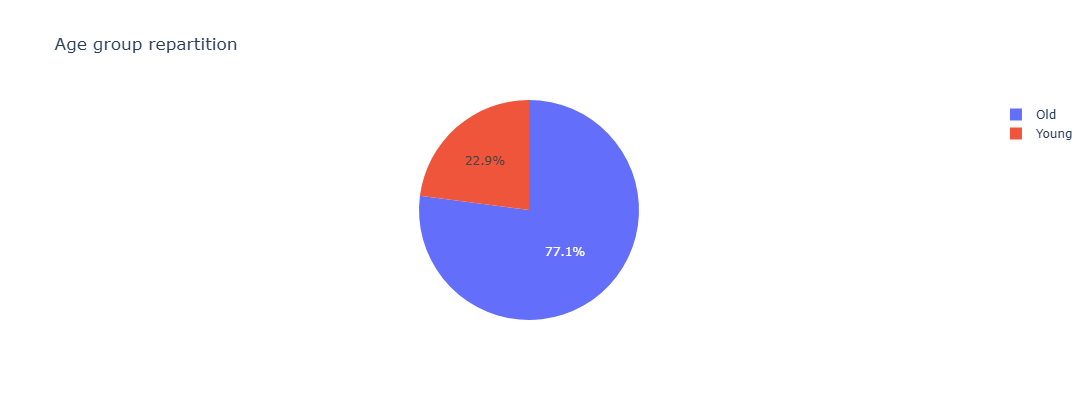

In [76]:
px.pie(age_group_g, names='age group', values='count', title='Age group repartition', width=500, height=400)

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).